In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-02,379.250000,384.037994,377.863007,381.315002,381.315002,1.236410e+07
1,2014-12-03,381.721985,383.026001,374.346008,375.010010,375.010010,1.334010e+07
2,2014-12-04,375.717987,378.654999,367.759003,369.604004,369.604004,1.452960e+07
3,2014-12-05,369.441986,379.191986,365.756012,376.854004,376.854004,1.518180e+07
4,2014-12-06,376.756989,378.447998,370.945007,374.785004,374.785004,7.009320e+06
...,...,...,...,...,...,...,...
2505,2021-10-11,54734.125000,57793.039063,54519.765625,57484.789063,57484.789063,4.263733e+10
2506,2021-10-12,57526.832031,57627.878906,54477.972656,56041.058594,56041.058594,4.108376e+10
2507,2021-10-13,56038.257813,57688.660156,54370.972656,57401.097656,57401.097656,4.168425e+10
2508,2021-10-14,57372.832031,58478.734375,56957.074219,57321.523438,57321.523438,3.661579e+10


In [ ]:
train = data[data['Date']< '2020-01-01'].copy()
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-02,379.250000,384.037994,377.863007,381.315002,381.315002,1.236410e+07
1,2014-12-03,381.721985,383.026001,374.346008,375.010010,375.010010,1.334010e+07
2,2014-12-04,375.717987,378.654999,367.759003,369.604004,369.604004,1.452960e+07
3,2014-12-05,369.441986,379.191986,365.756012,376.854004,376.854004,1.518180e+07
4,2014-12-06,376.756989,378.447998,370.945007,374.785004,374.785004,7.009320e+06
...,...,...,...,...,...,...,...
1851,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,2.277736e+10
1852,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,2.136567e+10
1853,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,2.244526e+10
1854,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,2.287413e+10


In [ ]:
test = data[data['Date']>'2020-05-21'].copy()
test

,Date,Open,High,Low,Close,Adj Close,Volume
1998,2020-05-22,9080.334961,9232.936523,9008.638672,9182.577148,9182.577148,2.981077e+10
1999,2020-05-23,9185.062500,9302.501953,9118.108398,9209.287109,9209.287109,2.772787e+10
2000,2020-05-24,9212.283203,9288.404297,8787.250977,8790.368164,8790.368164,3.251880e+10
2001,2020-05-25,8786.107422,8951.005859,8719.667969,8906.934570,8906.934570,3.128816e+10
2002,2020-05-26,8909.585938,8991.967773,8757.293945,8835.052734,8835.052734,2.958419e+10
...,...,...,...,...,...,...,...
2505,2021-10-11,54734.125000,57793.039063,54519.765625,57484.789063,57484.789063,4.263733e+10
2506,2021-10-12,57526.832031,57627.878906,54477.972656,56041.058594,56041.058594,4.108376e+10
2507,2021-10-13,56038.257813,57688.660156,54370.972656,57401.097656,57401.097656,4.168425e+10
2508,2021-10-14,57372.832031,58478.734375,56957.074219,57321.523438,57321.523438,3.661579e+10


In [ ]:
train = train.dropna()

In [ ]:
test = test.dropna()

In [ ]:
train = train.drop(['Date','Adj Close'],axis=1)

In [ ]:
test= test.drop(['Date','Adj Close'],axis=1)

In [ ]:
X_train = train.drop(['Open'],axis=1)
Y_train = train.Open

In [ ]:
X_test = test.drop(['Open'],axis=1)
Y_test = test.Open

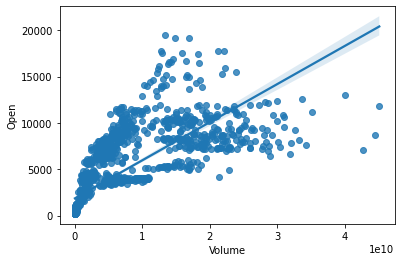

In [ ]:
import seaborn as sns
sns.regplot(x='Volume',y='Open',data=train)

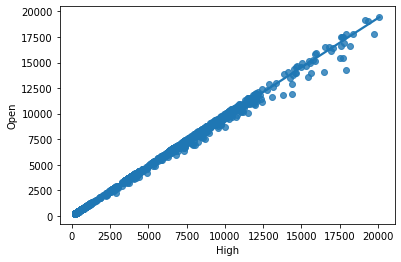

In [ ]:
import seaborn as sns
sns.regplot(x='High',y='Open',data=train)

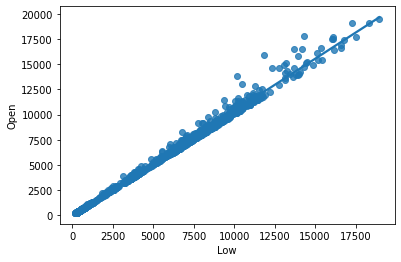

In [ ]:
import seaborn as sns
sns.regplot(x='Low',y='Open',data=train)

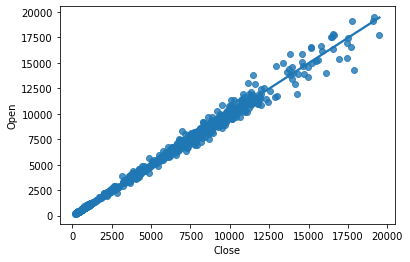

In [ ]:
import seaborn as sns
sns.regplot(x='Close',y='Open',data=train)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_predict = model.predict(X_test)

In [ ]:
Y_predict

array([ 9020.48243438,  9156.40210351,  9245.67450755,  8728.72776639,
        8862.91235794,  8859.43708678,  9176.14795744,  9448.00954638,
        9364.22261394,  9612.6314887 ,  9578.65400507, 10095.62746905,
        9461.3029073 ,  9604.48527023,  9799.82780287,  9654.66741876,
        9460.29476712,  9626.71393815,  9655.75116034,  9717.78402601,
        9865.59319771,  9318.47250868,  9356.06576264,  9381.37205266,
        9085.44529382,  9397.95954719,  9351.43485524,  9348.21046745,
        9364.39008753,  9259.62701334,  9330.7016986 ,  9313.86672662,
        9532.88853404,  9610.25488339,  9143.66287978,  9201.09458419,
        9111.92644889,  9004.67284215,  9055.68542139,  9110.06986544,
        9150.05742825,  9149.5165717 ,  9118.97968615,  9057.24491189,
        9026.60048052,  9064.11132846,  9258.71966461,  9239.45118251,
        9335.31484184,  9092.12819505,  9193.68380959,  9189.34384815,
        9219.06886625,  9155.7277925 ,  9190.79842934,  9114.01778005,
      

In [ ]:
print(model.intercept_)

1.8640515159554525


In [ ]:
print(model.coef_)

[ 1.10125793e+00  7.27391630e-01 -8.35644438e-01 -9.61567381e-10]


In [ ]:
from sklearn import metrics
print("Mean Squared Error",metrics.mean_squared_error(Y_test,Y_predict))
print("Mean absolute Error",metrics.mean_absolute_error(Y_test,Y_predict))
print("root Mean Squared Error",np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

Mean Squared Error 507496.9985824709
Mean absolute Error 432.27332183160854
root Mean Squared Error 712.3882358535062


In [ ]:
ouput = pd.DataFrame({"Y_test": Y_test,
                    "Y_predict": Y_predict})

In [ ]:
ouput.tail(10)

,Y_test,Y_predict
2500,51486.664063,51612.127387
2501,55338.625000,54879.877056
2502,53802.144531,55508.336506
2503,53929.781250,54130.653223
2504,54952.820313,55778.042030
2505,54734.125000,55226.285136
2506,57526.832031,56221.940549
2507,56038.257813,55073.958985
2508,57372.832031,57896.512538
2509,57345.902344,58958.631425


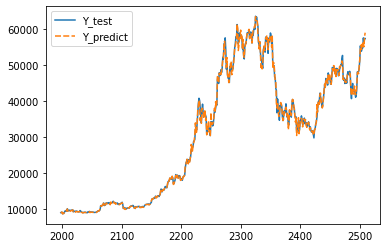

In [ ]:
import seaborn as sns
sns.lineplot(data = ouput)

In [ ]:
dffinal = pd.DataFrame()
dffinal['High'] = ['57793.039063']	
dffinal['Low'] = ['54519.765625']
dffinal['Close'] = ['57484.789063']
dffinal['Volume'] = ['4.263733e+10']
dffinal

,High,Low,Close,Volume
0,57793.039063,54519.765625,57484.789063,4.263733e+10


In [ ]:
model.predict(dffinal)

array([55226.28513811])

In [ ]:
60,523.00				61,290.07	

In [ ]:
dffinal1 = pd.DataFrame()
dffinal1['High'] = ['61988.68']	
dffinal1['Low'] = ['60436.54']
dffinal1['Close'] = ['61290.07']
dffinal1['Volume'] = ['44873883648']
dffinal1

,High,Low,Close,Volume
0,61988.68,60436.54,61290.07,44873883648


In [ ]:
model.predict(dffinal1)

array([60968.56771861])